In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sn

from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import datetime
from datetime import datetime as dt

In [55]:
#Global Temperatures 1750-2015
df_global=pd.read_csv('C:/Users/sadik/OneDrive/Masaüstü/desktop/datascience_temperature/GlobalTemperatures.csv')


#Glolal Temperatures by Countries 1743-2013
df_bycountry=pd.read_csv('C:/Users/sadik/OneDrive/Masaüstü/desktop/datascience_temperature/GlobalTemperaturesByCountry.csv')

In [56]:
df_global

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [57]:
#Describe 
df_global.describe()

 


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [58]:
## Get year values from all date column
df_global["dt"]= df_global["dt"].str.split("-", n = 1, expand = True)

In [59]:
#Get  mean Landtemperature value  of the years and append to the list 
averagetempsbyyear=[]
years=[]
for i in range(1750, 2016):
    averagetempsbyyear.append(df_global.loc[df_global['dt'].values==str(i)]['LandAverageTemperature'].mean())
    years.append(i)


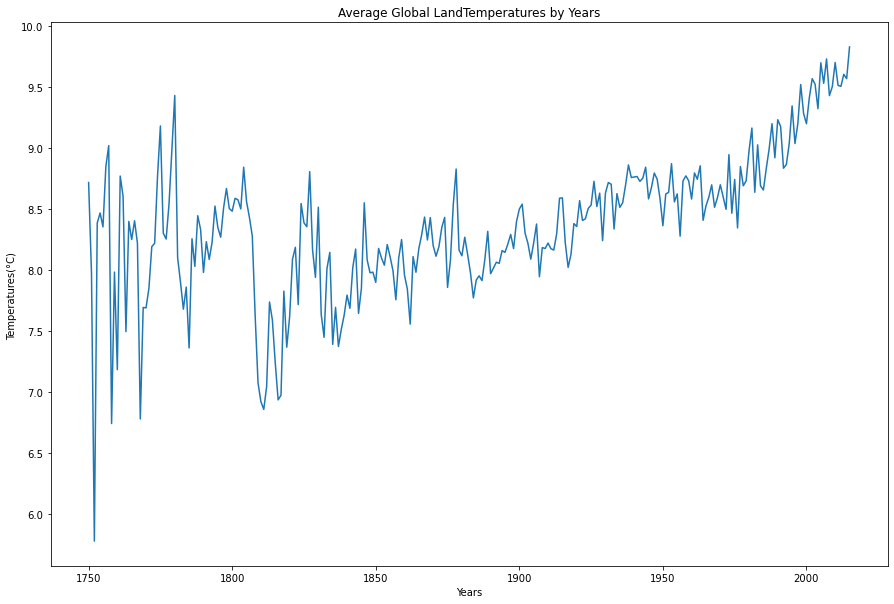

In [7]:
#Plotting the average landtemperature values by years
plt.figure(figsize=(15,10))

plt.xlabel('Years')
plt.title('Average Global LandTemperatures by Years')
plt.ylabel('Temperatures(°C) ')

plt.plot(years,averagetempsbyyear)

In [60]:
df_Turkey=df_bycountry.loc[df_bycountry['Country'] == "Turkey"]
#df_Turkey2=df_bycountry['Country']=="Turkey"
df_Turkey['dt']= df_Turkey["dt"].str.split("-", n = 1, expand = True)


df_Turkey




<ipython-input-60-8e5e4ba452c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Turkey['dt']= df_Turkey["dt"].str.split("-", n = 1, expand = True)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777,3.000,3.314,Turkey
533684,1777,NaN,NaN,Turkey
533685,1777,7.678,2.553,Turkey
533686,1777,15.293,3.189,Turkey
533687,1777,18.661,2.993,Turkey
...,...,...,...,...
536518,2013,17.522,0.360,Turkey
536519,2013,20.862,0.240,Turkey
536520,2013,23.335,0.281,Turkey
536521,2013,23.839,0.306,Turkey


In [61]:
averagetempsbyTurkey=[]
years=[]
for i in range(1777, 2014):
    averagetempsbyTurkey.append(df_Turkey.loc[df_Turkey['dt'].values==str(i)]['AverageTemperature'].mean())
    years.append(i)

    
    
    


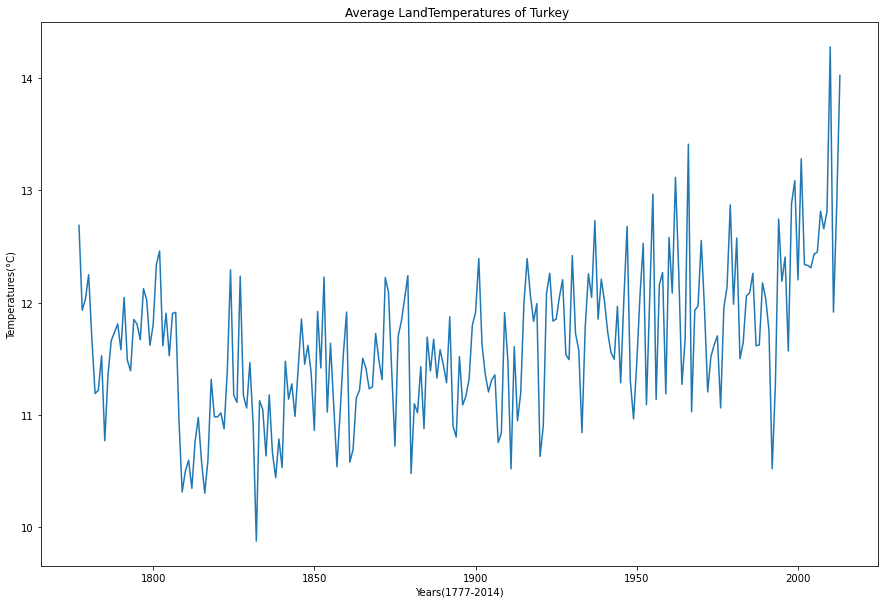

In [62]:
plt.figure(figsize=(15,10))
plt.plot(years,averagetempsbyTurkey)
plt.xlabel('Years(1777-2014)')
plt.title('Average LandTemperatures of Turkey ')
plt.ylabel('Temperatures(°C)')
plt.show()

 ## Linear Regression Global Temperature Values

In [63]:
#df_global.drop("LandMaxTemperatureUncertainty",axis=1)
df_global

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [64]:
df_global_old=pd.read_csv('C:/Users/sadik/OneDrive/Masaüstü/desktop/datascience_temperature/GlobalTemperatures.csv')


In [65]:
df_global_old

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [66]:
def convert_date_to_ordinal(date):
    return dt.strptime(date, '%Y-%m-%d').toordinal()


In [67]:
df_global_old['dt_ordinal'] = df_global_old['dt'].apply(lambda x: convert_date_to_ordinal(x))
#df_global_old['dt'][0]

In [53]:
df_global_old

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,dt_ordinal
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,638810
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,638841
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,638869
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,638900
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,638930
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,735811
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,735842
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,735872
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,735903


In [17]:
df_global_old_dropped = df_global_old.drop(["dt",
                                            "LandAverageTemperatureUncertainty",
                                            "LandMaxTemperature",
                                           "LandMaxTemperatureUncertainty",
                                           "LandMinTemperature",
                                           "LandMinTemperatureUncertainty",
                                            "LandAndOceanAverageTemperature",
                                           "LandAndOceanAverageTemperatureUncertainty"], axis=1)



df_global_old_dropped


,LandAverageTemperature,dt_ordinal
0,3.034,638810
1,3.083,638841
2,5.626,638869
3,8.490,638900
4,11.573,638930
...,...,...
3187,14.755,735811
3188,12.999,735842
3189,10.801,735872
3190,7.433,735903


In [86]:
df_global_old_dropped


,LandAverageTemperature,dt_ordinal
0,3.034,638810
1,3.083,638841
2,5.626,638869
3,8.490,638900
4,11.573,638930
...,...,...
3187,14.755,735811
3188,12.999,735842
3189,10.801,735872
3190,7.433,735903


<AxesSubplot:xlabel='dt_ordinal', ylabel='LandAverageTemperature'>

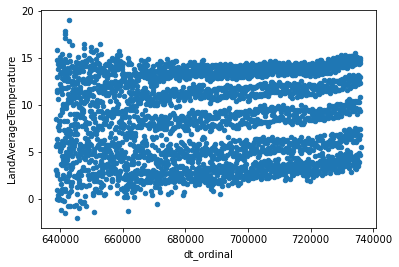

In [87]:
df_global_old_dropped.plot(kind="scatter",x="dt_ordinal",y="LandAverageTemperature")

In [88]:
x_train,x_test,y_train,y_test=train_test_split(df_global_old_dropped.dt_ordinal,df_global_old_dropped.LandAverageTemperature)


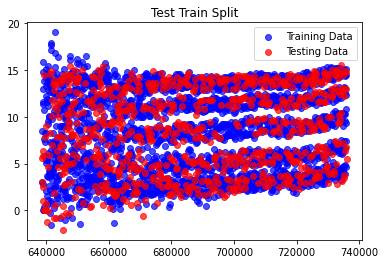

In [89]:
plt.scatter(x_train,y_train,label='Training Data',color='blue',alpha=.7)
plt.scatter(x_test,y_test,label='Testing Data',color='red',alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [90]:
#linear Regression Model

model=linear_model.LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values)


LinearRegression()

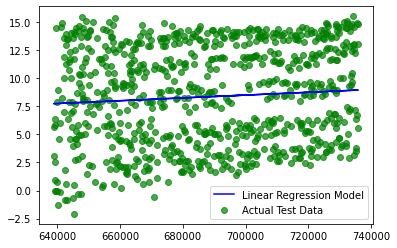

In [91]:
#Prediction

prediction=model.predict(x_test.values.reshape(-1,1))

#Plotting

plt.plot(x_test,prediction,label="Linear Regression Model",color="b")
plt.scatter(x_test,y_test,label="Actual Test Data",color="g",alpha=0.7)
plt.legend()
plt.show()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,pred
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,7.764967
1,1750-01-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,7.764967
2,1750-01-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,7.764967
3,1750-01-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,7.764967
4,1750-01-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,7.764967
...,...,...,...,...,...,...,...,...,...,...
3187,2015-01-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,8.985165
3188,2015-01-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,8.985165
3189,2015-01-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,8.985165
3190,2015-01-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,8.985165


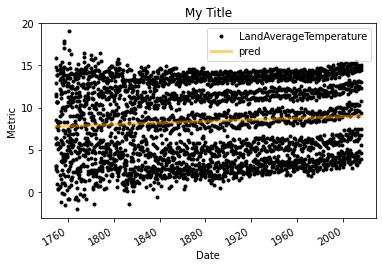

In [101]:
df_global=df_global.fillna(method="ffill")
df_global.dt = pd.to_datetime(df_global.dt)


regr = linear_model.LinearRegression()
regr.fit(df_global.dt.values.reshape(-1, 1), df_global.LandAverageTemperature.values.reshape(-1, 1))

# Make predictions using the testing set
y_pred = regr.predict(df_global.dt.values.astype(float).reshape(-1, 1))
df_global['pred'] = y_pred

ax = df_global.plot(x='dt', y='LandAverageTemperature', color='black', style='.')
df_global.plot(x='dt', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('My Title')
ax.set_xlabel('Date')
ax.set_ylabel('Metric')

plt.show()